# Reacciones autocatalíticas

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FOLDER = "velocidad_reaccion"

In [3]:
os.makedirs(FOLDER, exist_ok=True)

## Reacción autocatalítica simple

Sea la reacción:

$$
A + B \overset{k}{\rightarrow} 2B
$$

Con cinética de reacción:

$$
r_{A} = \frac{dA}{dt} = -kC_{A}C_{B}
$$

Para simplificar, graficaremos numéricamente:

$$
C_{A, i+1} = C_{A, i} + r_{A} \Delta t = C_{A, i} - kC_{A, i}C_{B, i} \Delta t
$$

$$
C_{B, i + 1} = C_{B, i} - 2 \cdot r_{A} \Delta t = C_{B, i} + 2 \cdot kC_{A, i}C_{B, i} \Delta t
$$

In [4]:
# Datos

C_A0 = 1  # M
C_B0 = 0.01  # M
k = 1
DELTA_T = 0.001


def step(c_a, c_b, t):
    t += DELTA_T
    c_a -= k * c_a * c_b * DELTA_T
    c_b += k * c_a * c_b * DELTA_T
    return c_a, c_b, t

In [5]:
C_A = [C_A0]
C_B = [C_B0]
T = [0]

In [6]:
# Numero de iteraciones
N = int(1e4)

for _ in range(N):
    values = step(C_A[-1], C_B[-1], T[-1])
    C_A.append(values[0])
    C_B.append(values[1])
    T.append(values[2])

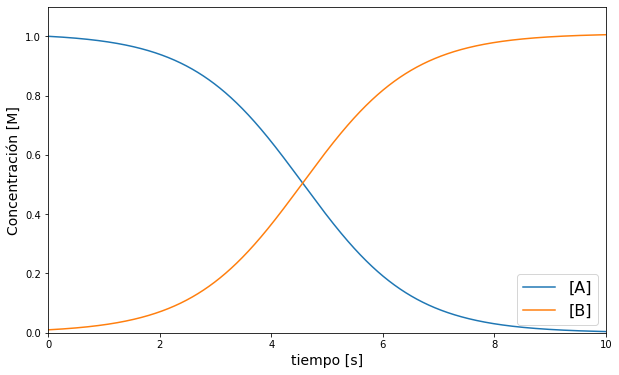

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(T, C_A, label="[A]")
ax.plot(T, C_B, label="[B]")

ax.set_xlim(T[0], T[-1])
ax.set_ylim(0, C_A[0] + 0.1)

ax.set_xlabel("tiempo [s]", fontsize=14)
ax.set_ylabel("Concentración [M]", fontsize=14)

ax.legend(fontsize=16)

fig.savefig(os.path.join(FOLDER, "autocatalitica_simple.png"))

## Creciemto celular

Usando:

$$
\frac{dX}{dt} = \mu X
$$

Numéricamente:

$$
X_{i+1} = X_{i} + \frac{dX}{dt} \Delta t = X_{i} + \mu X_{i} \Delta t
$$

In [8]:
# Datos

X_0 = 0.01  # g/L
mu = 0.1  # 1/min
DELTA_T = 0.01

Esta vez fijamos un límite de crecimiento a los $200 \left [ \frac{g}{L} \right ]$. Este límite es mucho más suave, pero para simplificar será abrupto.

In [9]:
def step(x, t):
    t += DELTA_T
    x = min(x + mu * x * DELTA_T, 200)
    return x, t

In [10]:
X = [X_0]
T = [0]

In [11]:
# Numero de iteraciones
N = int(2e4)

for _ in range(N):
    values = step(X[-1], T[-1])
    X.append(values[0])
    T.append(values[1])

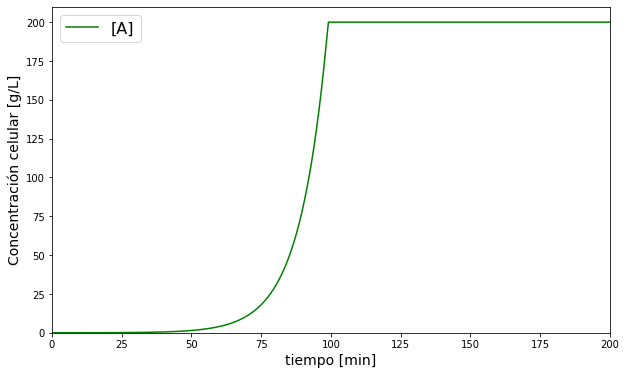

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(T, X, label="[A]", color="green")

ax.set_xlim(T[0], T[-1])
ax.set_ylim(0, X[-1] + 10)

ax.set_xlabel("tiempo [min]", fontsize=14)
ax.set_ylabel("Concentración celular [g/L]", fontsize=14)

ax.legend(fontsize=16)

fig.savefig(os.path.join(FOLDER, "crecimiento_celular.png"))